In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Salary_Data.csv")

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
df[df.duplicated()]

,YearsExperience,Salary


In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Checking for Outliers

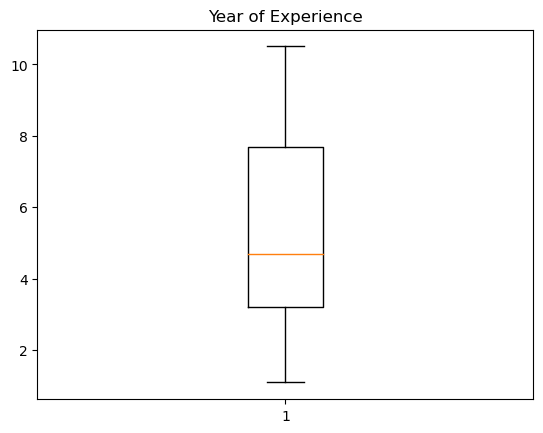

In [12]:
plt.plot(figsize=(7,3))
plt.boxplot(df["YearsExperience"])
plt.title("Year of Experience")
plt.show()

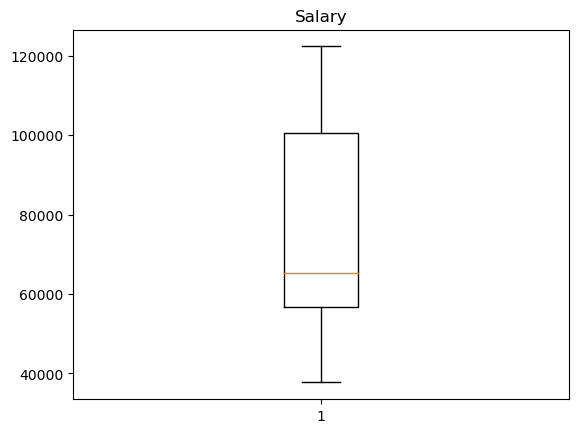

In [13]:
plt.plot(figsize=(7,3))
plt.boxplot(df["Salary"])
plt.title("Salary")
plt.show()

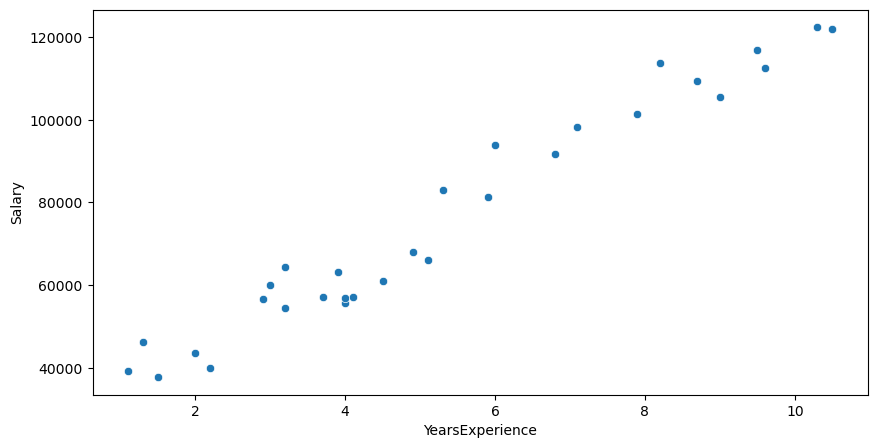

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["YearsExperience"], y=df["Salary"])
plt.show()

In [16]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

In [17]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

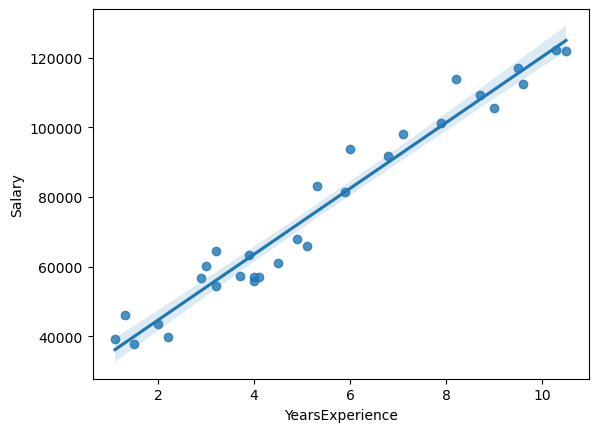

In [18]:
sns.regplot(y=df["Salary"], x=df["YearsExperience"])

Feature Engineering

In [19]:
import statsmodels.api as smf
import statsmodels.formula.api as sm

Text(0.5, 1.0, 'Salary before transformation')

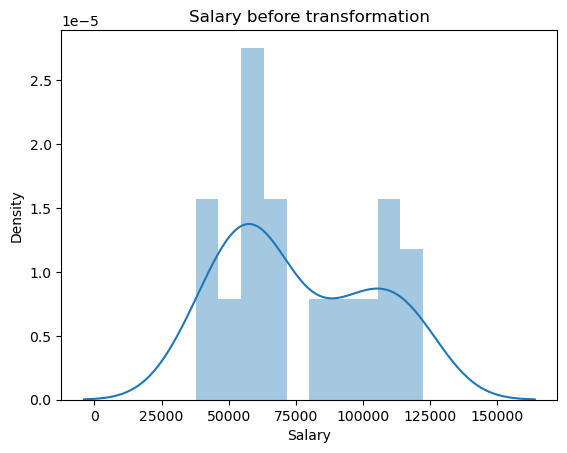

In [20]:
sns.distplot(df["Salary"], bins=10, kde=True)
plt.title("Salary before transformation")

Text(0.5, 1.0, 'Salary')

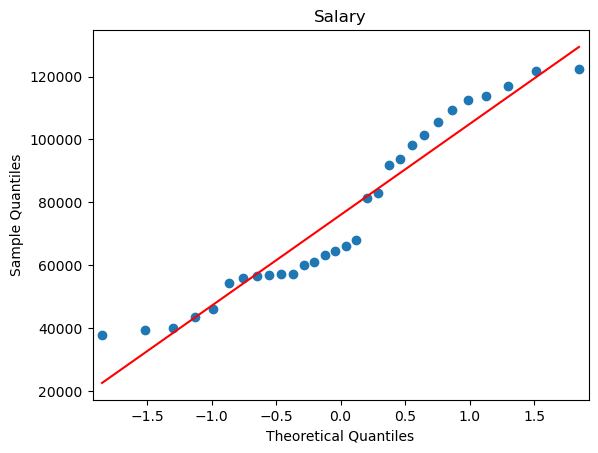

In [22]:
smf.qqplot(df["Salary"], line='r')
plt.title("Salary")

In [27]:
model = sm.ols("Salary~YearsExperience", data=df).fit()

In [28]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [29]:
model.fittedvalues

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        00:02:57   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Log Transformation

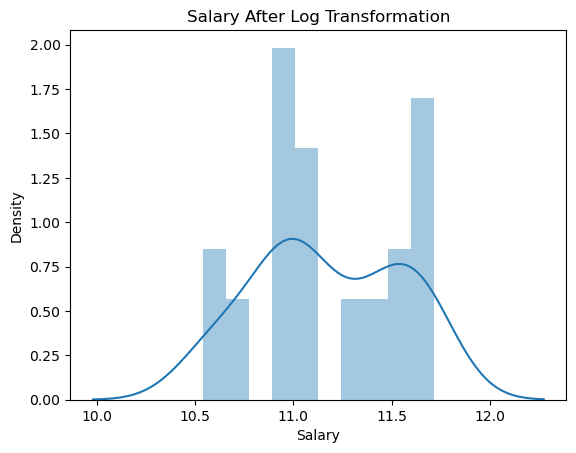

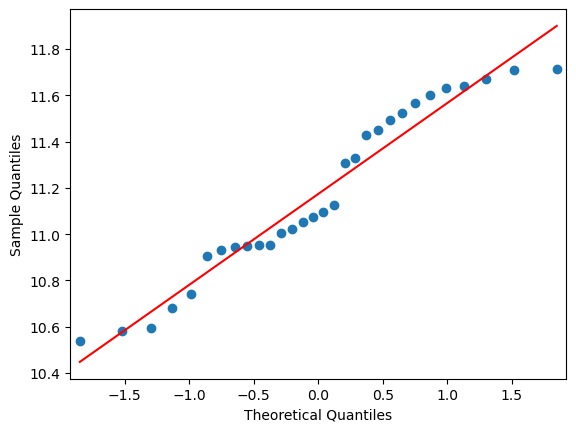

In [40]:
sns.distplot(np.log(df["Salary"]), bins=10, kde=True)
plt.title("Salary After Log Transformation")
smf.qqplot(np.log(df["Salary"]), line='r')
plt.show()

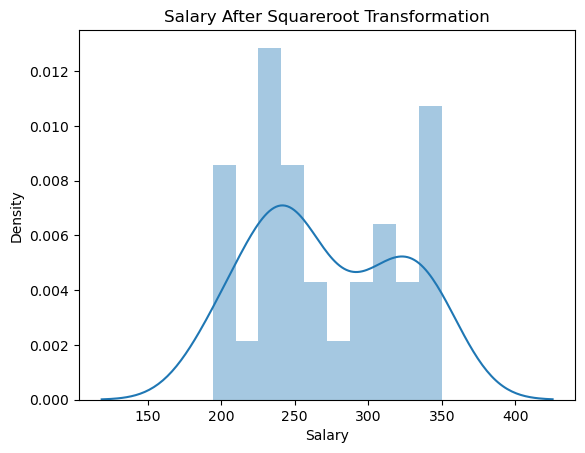

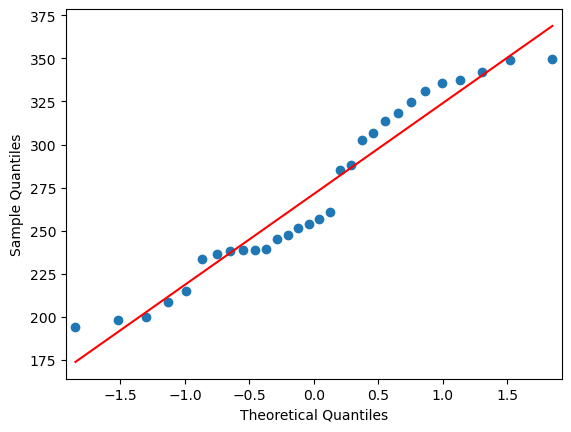

In [38]:
sns.distplot(np.sqrt(df["Salary"]), bins=10, kde=True)
plt.title("Salary After Squareroot Transformation")
smf.qqplot(np.sqrt(df["Salary"]), line='r')
plt.show()

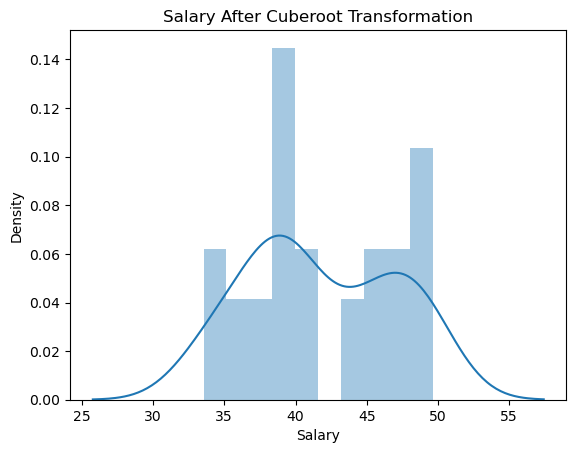

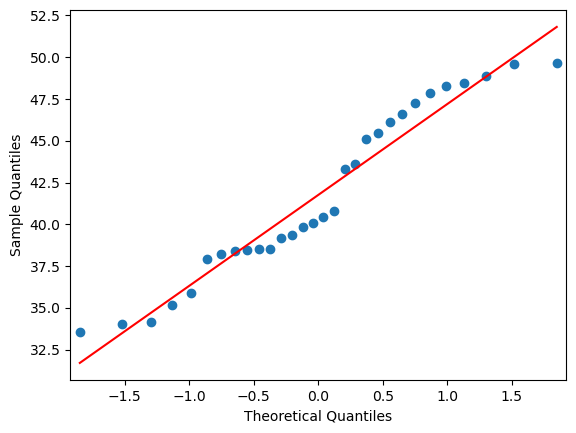

In [39]:
sns.distplot(np.cbrt(df["Salary"]), bins=10, kde=True)
plt.title("Salary After Cuberoot Transformation")
smf.qqplot(np.cbrt(df["Salary"]), line='r')
plt.show()

Transformation of Years Experience

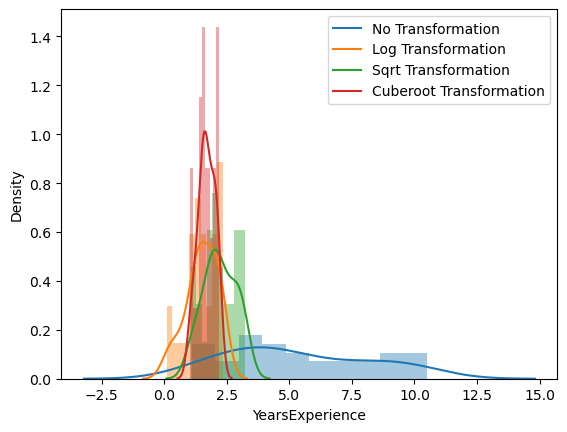

In [42]:
sns.distplot(df["YearsExperience"], bins=10, kde=True)
sns.distplot(np.log(df["YearsExperience"]), bins=10, kde=True)
sns.distplot(np.sqrt(df["YearsExperience"]), bins=10, kde=True)
sns.distplot(np.cbrt(df["YearsExperience"]), bins=10, kde=True)
labels = ["No Transformation", "Log Transformation", "Sqrt Transformation", "Cuberoot Transformation"]
plt.legend(labels)
plt.show()

Text(0.5, 1.0, 'Cuberoot Transformation')

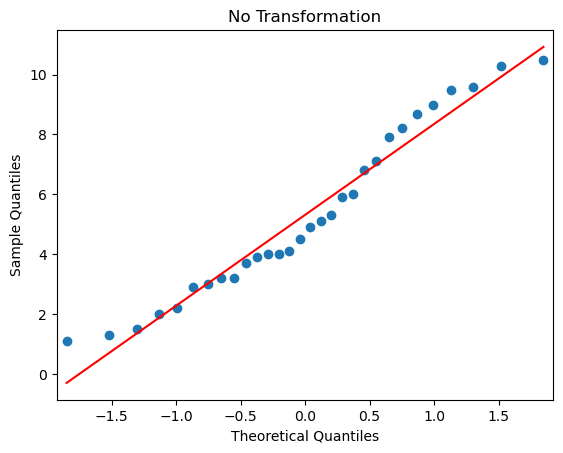

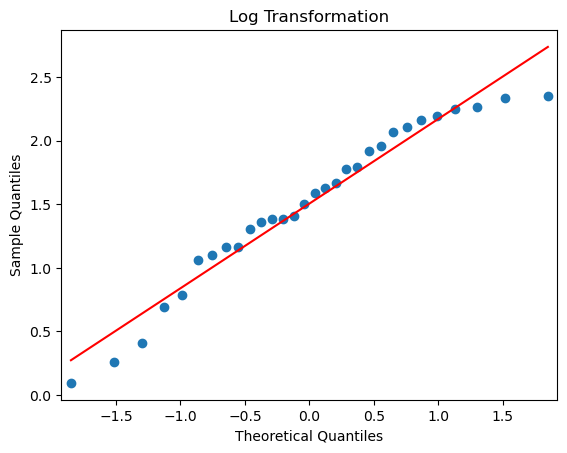

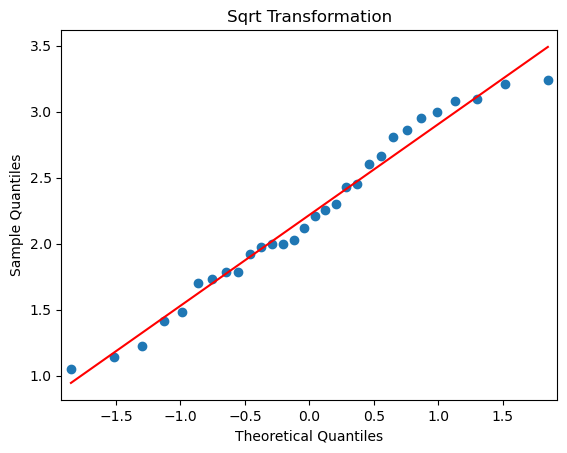

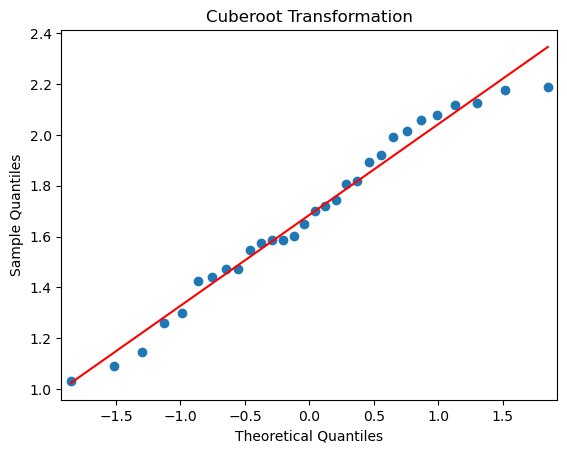

In [43]:
smf.qqplot(df["YearsExperience"], line='r')
plt.title("No Transformation")
smf.qqplot(np.log(df["YearsExperience"]), line='r')
plt.title("Log Transformation")
smf.qqplot(np.sqrt(df["YearsExperience"]), line='r')
plt.title("Sqrt Transformation")
smf.qqplot(np.cbrt(df["YearsExperience"]), line='r')
plt.title("Cuberoot Transformation")

Fitting a Linear Regression Model on Tramsformation: 

Log Transformation

In [46]:
model_log = sm.ols('np.log(Salary)~np.log(YearsExperience)', data=df).fit()

In [47]:
model_log.params

Intercept                  10.328043
np.log(YearsExperience)     0.562089
dtype: float64

In [48]:
model_log.fittedvalues

0     10.381616
1     10.475515
2     10.555951
3     10.717653
4     10.771226
5     10.926505
6     10.945561
7     10.981837
8     10.981837
9     11.063442
10    11.093033
11    11.107264
12    11.107264
13    11.121143
14    11.173468
15    11.221335
16    11.243821
17    11.265443
18    11.325724
19    11.335171
20    11.405524
21    11.429791
22    11.489804
23    11.510753
24    11.544023
25    11.563079
26    11.593469
27    11.599355
28    11.638915
29    11.649725
dtype: float64

In [49]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           7.40e-16
Time:                        00:31:53   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Square root Transformation:

In [50]:
model_sqrt = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data=df).fit()

In [51]:
model_sqrt.params

Intercept                   103.568031
np.sqrt(YearsExperience)     75.626932
dtype: float64

In [53]:
model_sqrt.fittedvalues

0     182.886226
1     189.796000
2     196.191728
3     210.520663
4     215.740898
5     232.356055
6     234.557719
7     238.853599
8     238.853599
9     249.039339
10    252.919254
11    254.821894
12    254.821894
13    256.700896
14    263.996980
15    270.975381
16    274.357689
17    277.674303
18    287.265210
19    288.815425
20    300.778941
21    305.082231
22    316.132184
23    320.130606
24    326.635432
25    330.448826
26    336.665890
27    337.889509
28    346.282180
29    348.627298
dtype: float64

In [54]:
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           7.58e-19
Time:                        00:35:05   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Cube Root Transformation

In [56]:
model_cbrt = sm.ols('np.cbrt(Salary)~np.sqrt(YearsExperience)', data=df).fit()

In [57]:
model_cbrt.params

Intercept                   24.475692
np.sqrt(YearsExperience)     7.791881
dtype: float64

In [58]:
model_cbrt.fittedvalues

0     32.647886
1     33.359804
2     34.018759
3     35.495076
4     36.032920
5     37.744788
6     37.971626
7     38.414233
8     38.414233
9     39.463675
10    39.863425
11    40.059454
12    40.059454
13    40.253049
14    41.004768
15    41.723756
16    42.072237
17    42.413950
18    43.402106
19    43.561825
20    44.794432
21    45.237802
22    46.376285
23    46.788244
24    47.458440
25    47.851336
26    48.491883
27    48.617953
28    49.482654
29    49.724273
dtype: float64

In [59]:
model_cbrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     468.5
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           5.06e-19
Time:                        00:36:37   Log-Likelihood:                -47.882
No. Observations:                  30   AIC:                             99.76
Df Residuals:                      28   BIC:                             102.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   24.4757      0.830     29.495      0.000      22.776      26.176
np.sqrt(YearsExperience)     7.7919      0.360     21.644      0.000       7.054       8.529
==============================================================================
Omnibus:                        1.125   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.570   Jarque-Bera (JB):                0.903
Skew:                           0.131   Prob(JB):                        0.637
Kurtosis:                       2.191   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model Testing

As we know, equation of line is y = mx+c <br>
let us redefine as, y = beta0 + beta1(x) 

In [60]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

here intercept (beta0) = 25792.2 and independent variable, sorting time (beta1) = 9449.2 <br> 
Hypothesis testing of x variable by findng t_statistics and p_values for beta1, i.e.,<br>
<br>if p_value<alpha=0.05, we reject the Null Hypothesis <br>
<br> Null Hypothesis as beta1=0 (no slope) 
<br> Alternate Hypothtesis as beta1 = m (some significant slope)


In [61]:
print(model.tvalues)
print(model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64
Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


beta0: t_value = 11.34, pvalue=0.00000000055 <br>
beta1: t_value = 24.95, p_value = 0.0000000000000000000114 <br>
Since p_value < 0.05, thus we Reject Null Hypothesis. Therefore x(sorting) variable has good slope and variance with respect y(delivery)

In [62]:
print(model.rsquared)
print(model.rsquared_adj)

0.9569566641435086
0.9554194021486339


Determination Coefficient = rsquared value = 68% <br>
good fit if, rsquared >= 85%

Model Validation

In [64]:
from sklearn.metrics import mean_squared_error

In [67]:
model_sqrt_y_pred = np.square(model_sqrt.predict(df["YearsExperience"]))
model_log_y_pred = np.exp(model_log.predict(df["YearsExperience"]))
model_cbrt_y_pred = pow(model_cbrt.predict(df["YearsExperience"]), 3)

In [69]:
model_sqrt_rmse = np.sqrt(mean_squared_error(df["Salary"],model_sqrt_y_pred))
model_log_rmse = np.sqrt(mean_squared_error(df["Salary"],model_log_y_pred))
model_cbrt_rmse = np.sqrt(mean_squared_error(df["Salary"],model_cbrt_y_pred))

print('model: ', np.sqrt(model.mse_resid))
print("model_log: ", model_log_rmse)
print("model_sqrt: ", model_sqrt_rmse)
print("model_cbrt: ", model_cbrt_rmse)

model:  5788.315051119394
model_log:  7219.716974372787
model_sqrt:  5960.647096174305
model_cbrt:  5780.999988988331


Here we can see that model_cbrt has least RMSE(root mean squared error) <br>
<br> Predicting values from model with Cube Root Transformation on the Data

In [71]:
pred = pd.DataFrame()
pred["YearsExperience"] = df["YearsExperience"]
pred["Salary"] = df["Salary"]
pred["Predicted_Value"] = pd.DataFrame(pow(model_cbrt.predict(pred["YearsExperience"]),3))

In [72]:
pred

,YearsExperience,Salary,Predicted_Value
0,1.1,39343.0,34798.874625
1,1.3,46205.0,37125.341327
2,1.5,37731.0,39369.090960
3,2.0,43525.0,44720.261880
4,2.2,39891.0,46784.108590
5,2.9,56642.0,53773.828674
6,3.0,60150.0,54749.176562
7,3.2,54445.0,56686.089247
8,3.2,64445.0,56686.089247
9,3.7,57189.0,61460.002291


Predicting the Values without Transformation

In [74]:
pred2 = pd.DataFrame()
pred2["YearsExperience"] = df["YearsExperience"]
pred2["Salary"] = df["Salary"]
pred2["Predicted_Value"] = pd.DataFrame((model.predict(pred["YearsExperience"])))

In [75]:
pred2

,YearsExperience,Salary,Predicted_Value
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [78]:
predicted = pd.DataFrame()
predicted["YearsExperience"] = df["YearsExperience"]
predicted["Salary"] = df["Salary"]
predicted["Predicted_Salary"] = pred["Predicted_Value"]
predicted["Predicted_Salary_CbrtTransformation"] = pred2["Predicted_Value"]

In [79]:
predicted

,YearsExperience,Salary,Predicted_Salary,Predicted_Salary_CbrtTransformation
0,1.1,39343.0,34798.874625,36187.158752
1,1.3,46205.0,37125.341327,38077.151217
2,1.5,37731.0,39369.090960,39967.143681
3,2.0,43525.0,44720.261880,44692.124842
4,2.2,39891.0,46784.108590,46582.117306
5,2.9,56642.0,53773.828674,53197.090931
6,3.0,60150.0,54749.176562,54142.087163
7,3.2,54445.0,56686.089247,56032.079627
8,3.2,64445.0,56686.089247,56032.079627
9,3.7,57189.0,61460.002291,60757.060788
